In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
import numpy as np

# **1st -Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.**

In [3]:
#Importing dataset
startup=pd.read_csv("/content/50_Startups.csv")

In [4]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
## Renaming the columns
st=startup.rename({"R&D Spend":"RnD","Administration":"admin","Marketing Spend":"MKT","Profit":"profit"},axis=1)
st

,RnD,admin,MKT,State,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
## Checking the information
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RnD     50 non-null     float64
 1   admin   50 non-null     float64
 2   MKT     50 non-null     float64
 3   State   50 non-null     object 
 4   profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
# Checking the descriptive stats
st.describe()

,RnD,admin,MKT,profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
# checking the duplicatae values
st[st.duplicated()].shape

(0, 5)

In [9]:
# Checking the null values
st.isnull().sum()

RnD       0
admin     0
MKT       0
State     0
profit    0
dtype: int64

In [10]:
# Checking the correlation betn the variables
st.corr()

<ipython-input-10-86bbd07342ad>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  st.corr()


,RnD,admin,MKT,profit
RnD,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
profit,0.972900,0.200717,0.747766,1.000000


**There is high correlation between R&D and profit.**

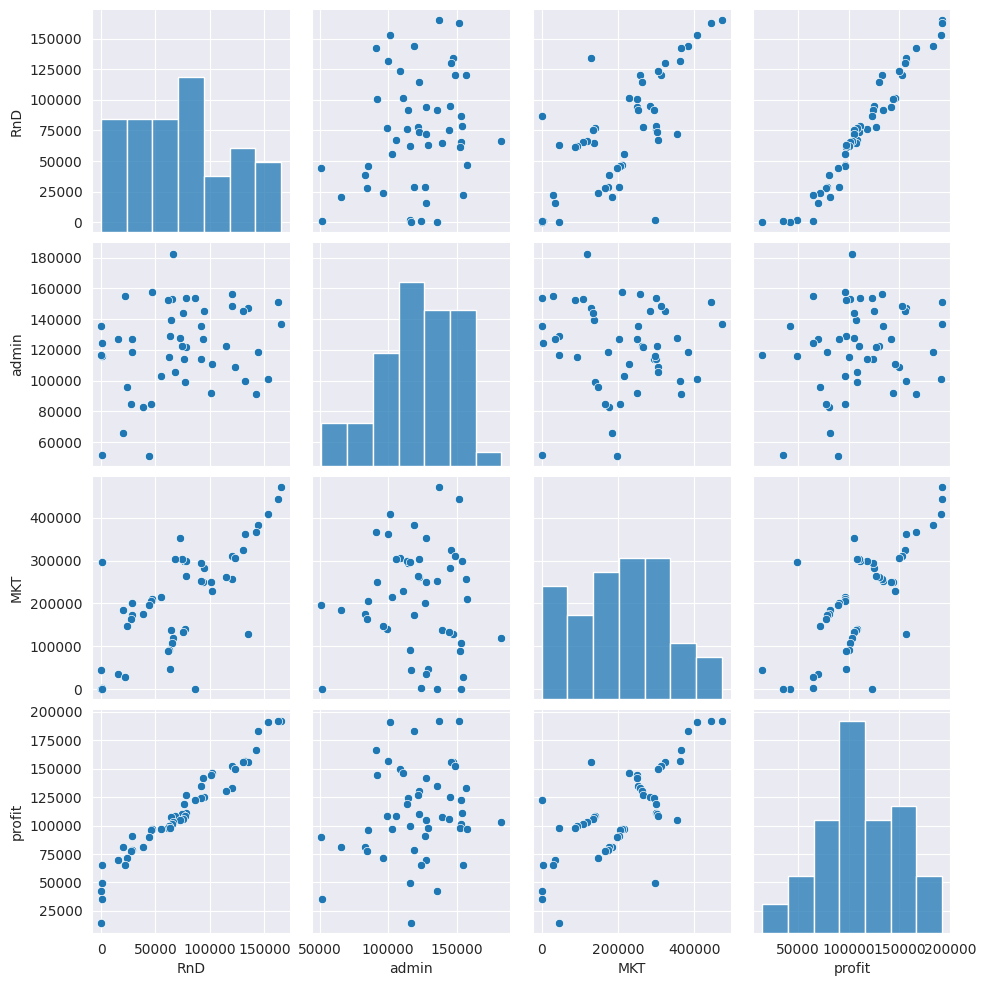

In [11]:
## Scatterplot between variables along with histograms
sns.set_style(style="darkgrid")
sns.pairplot(st)

# **Above pairplot shows the high correlation between R&D and profit**

**Model Building**

In [12]:
import statsmodels.formula.api as smf

In [13]:
model=smf.ols("profit~RnD+admin+MKT",data=st).fit() # Profit is Y variable(Dependent), rnd,admin,mkt are x varianlble(Independent Variables)

In [14]:
print("tvalues","\n",model.tvalues,"\n","\n","pvalues","\n",model.pvalues)

tvalues 
 Intercept     7.626218
RnD          17.846374
admin        -0.525507
MKT           1.655077
dtype: float64 
 
 pvalues 
 Intercept    1.057379e-09
RnD          2.634968e-22
admin        6.017551e-01
MKT          1.047168e-01
dtype: float64


In [15]:
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [16]:
##Now we will carry simple linear regression model.for each x variable column
sl_mkt=smf.ols("profit~MKT",data=st).fit()
sl_mkt.tvalues,sl_mkt.pvalues

(Intercept    7.808356
 MKT          7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MKT          4.381073e-10
 dtype: float64)

In [17]:
sl_adm=smf.ols("profit~admin",data=st).fit()
sl_adm.tvalues,sl_adm.pvalues

(Intercept    3.040044
 admin        1.419493
 dtype: float64,
 Intercept    0.003824
 admin        0.162217
 dtype: float64)

# **Model valdation by Co-linearity check**

In [18]:
# We are calculating the VIF value of all independent variables, i.e(all x variables)
#VIF-variance inflation factor

rsq_RnD=smf.ols("RnD~admin+MKT",data=st).fit().rsquared
vif_rsq_RnD=1/(1-rsq_RnD)

rsq_admin=smf.ols("admin~RnD+MKT",data=st).fit().rsquared
vif_rsq_admin=1/(1-rsq_admin)

rsq_mkt=smf.ols("MKT~admin+RnD",data=st).fit().rsquared
vif_rsq_mk=1/(1-rsq_mkt)

df={"Parameters":["RnD","admin","MKT"],"VIF_values":[vif_rsq_RnD,vif_rsq_admin,vif_rsq_mk]}
VIF_df=pd.DataFrame(df)
VIF_df

,Parameters,VIF_values
0,RnD,2.468903
1,admin,1.175091
2,MKT,2.326773


In [19]:
# None variable has VIF>20, so there is No Collinearity issue, so consider all varaibles in Regression equation

# **Model validation by Residual Analysis**

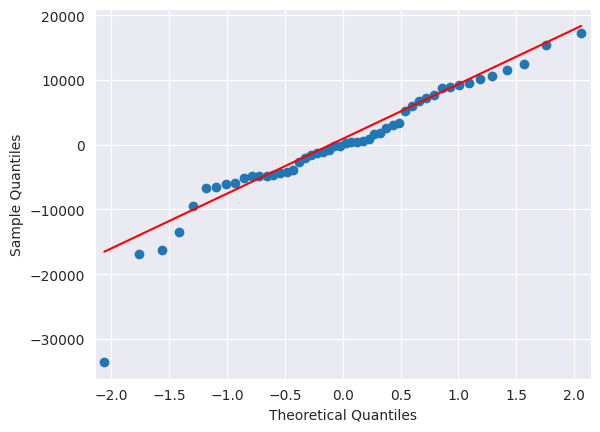

In [20]:
import statsmodels.api as sm
## Testing normality of residual by QQ plot
sm.qqplot(model.resid,line="q")
plt.show()

In [21]:
# List down the residual which are less than -30,000 , because the outlier is appox at -30,000
list(np.where(model.resid<-30000))

[array([49])]

This shows that there is a outlier in the row 42

In [22]:
## Function defination for Z score, (Xi - mean)/std. dev.
def std(x):
  return(x-x.mean())/x.std()

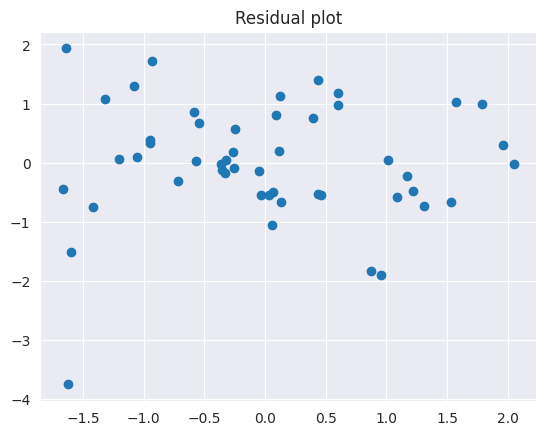

In [23]:
plt.scatter(std(model.fittedvalues),std(model.resid))
plt.title("Residual plot")
plt.show()

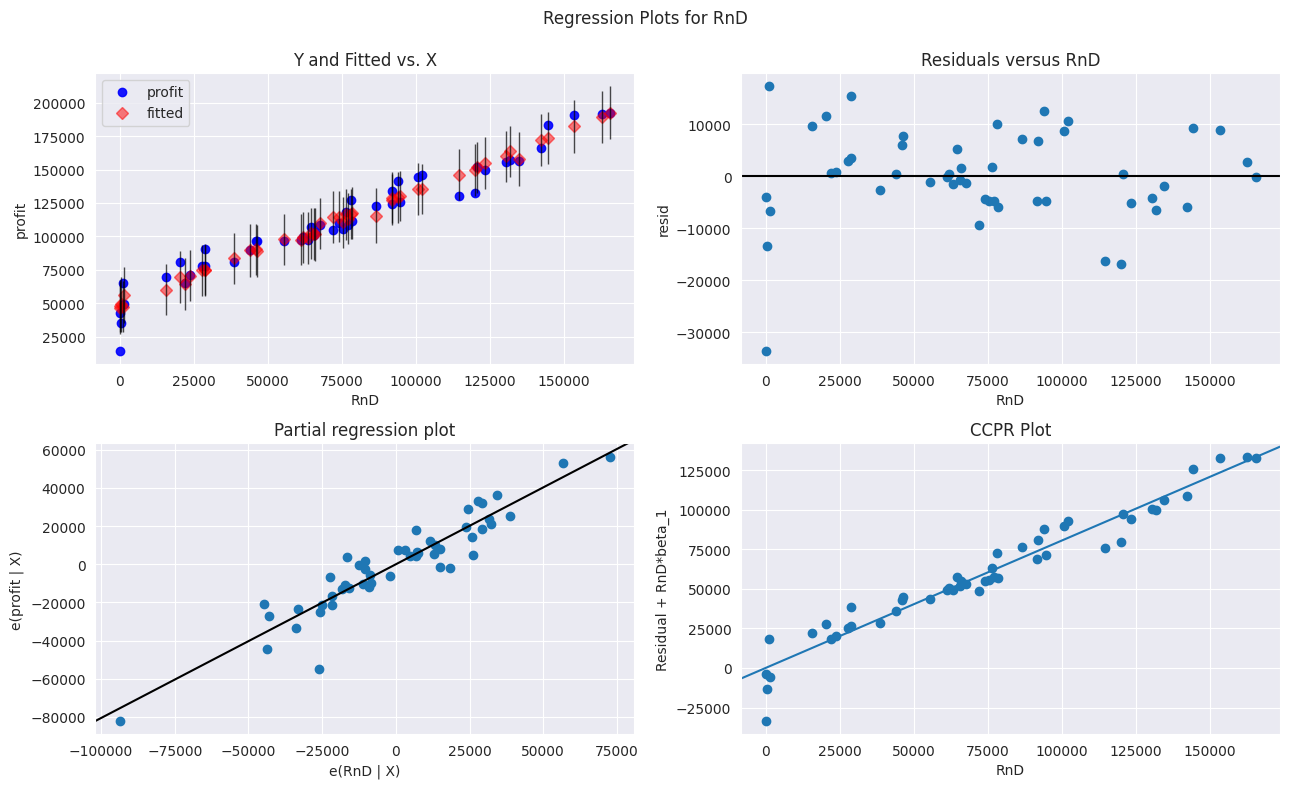

In [24]:
# Plotting residual Vs regressor plot to visualise the relation beween independent variable and dependent variables and erros
fig=plt.figure(figsize=(13,8))
sm.graphics.plot_regress_exog(model,"RnD",fig=fig)
plt.show()

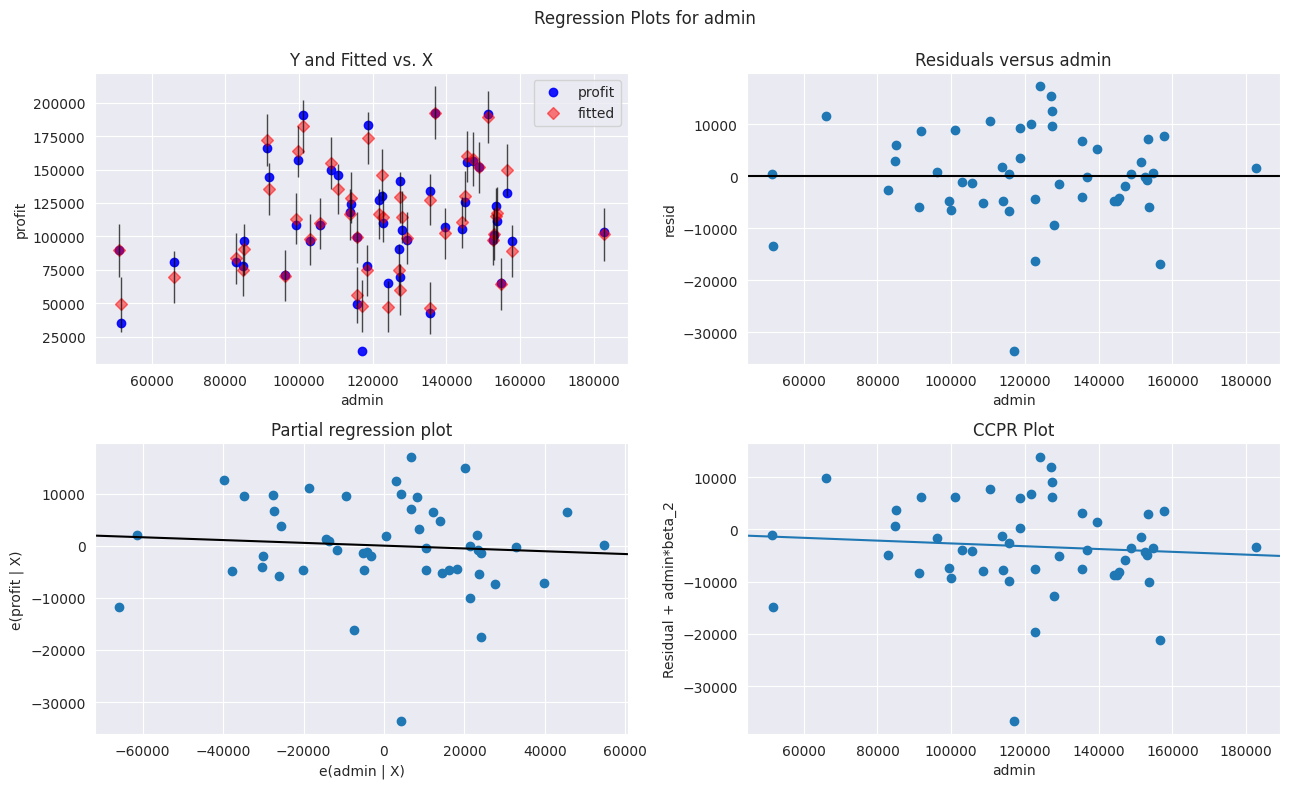

In [25]:
# now plotting  residual Vs regressor for admin
fig=plt.figure(figsize=(13,8))
sm.graphics.plot_regress_exog(model,"admin",fig)
plt.show()

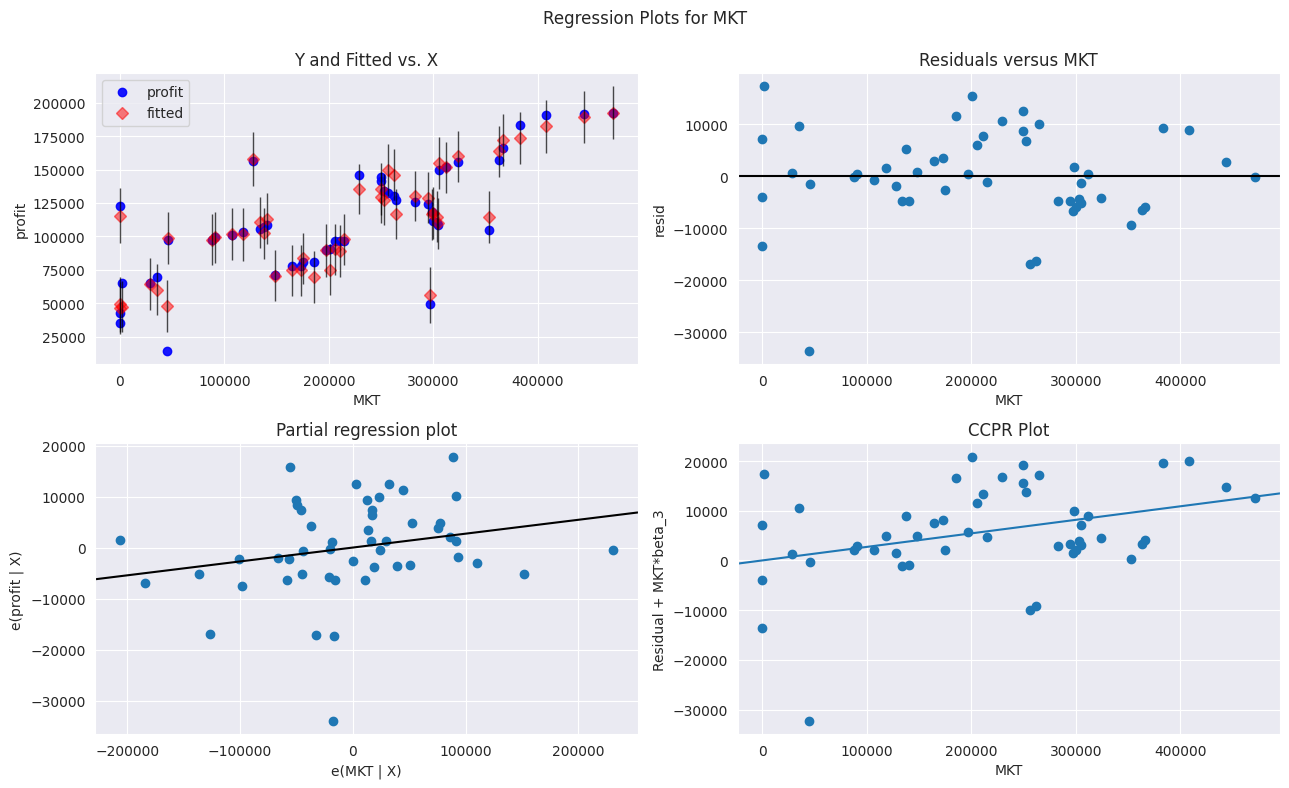

In [26]:
#  residual Vs regressor for MKT
fig=plt.figure(figsize=(13,8))
sm.graphics.plot_regress_exog(model,"MKT",fig)
plt.show()

# **Model Deletion Diagnostics for checking if there are any influencers or outlier by cooks distance**

In [27]:
from statsmodels.graphics.regressionplots import influence_plot

In [28]:
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

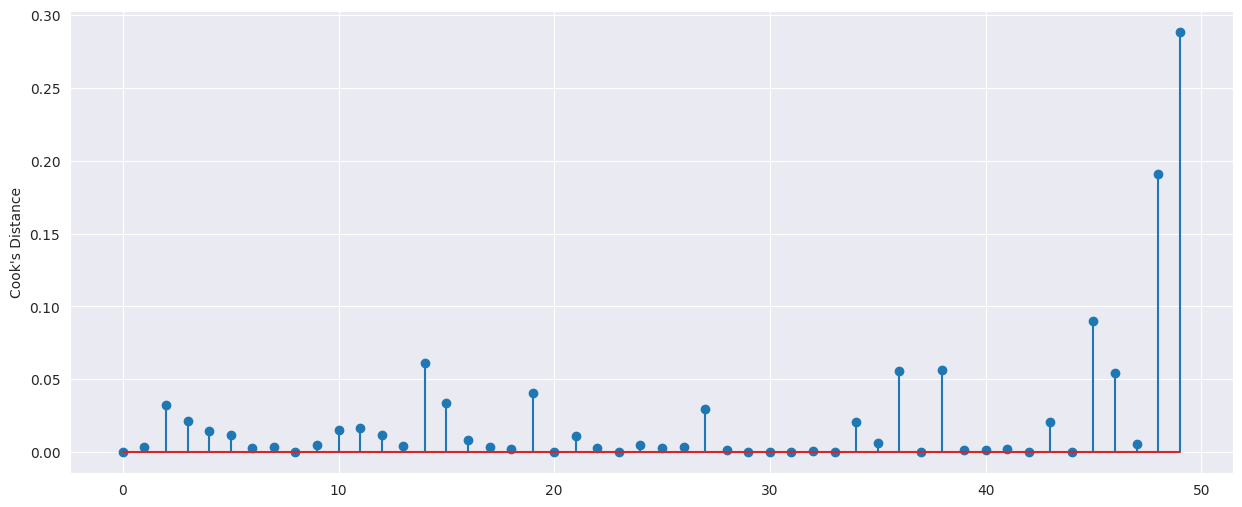

In [29]:
# Ploting stem plot to check the influencers
plt.figure(figsize=(15,6))
plt.stem(np.arange(len(st)),np.round(c,5))
plt.ylabel("Cook's Distance")
plt.show()

In [30]:
#The Cook's distance is considered high if it is greater than 0.5 and extreme if it is greater than 1.
# If the value of Cook's distance is less than 1 then there is outlier
np.max(c),np.argmax(c)

(0.2880822927543272, 49)

In [31]:
# 0.2880822927543272 is the cook's distance for the index of 49

**With the cook's distance value which is 0.2 which is less than 0.5(standard) which means we don't need to do diagnose the model, but will do to see explore further process if where would have been any influencer.**

# **Model Deletion Diagnostics for checking if there are any influencers or outlier by leverage points**

In [32]:
# Leverage points, leverage cuttoff value= 3*(k+1)/n
# K= no of variables(columns), n= No of data points= (rows)
n=st.shape[0]
k=st.shape[1]
leverage_cutoff=3*(k+1)/n
leverage_cutoff

0.36

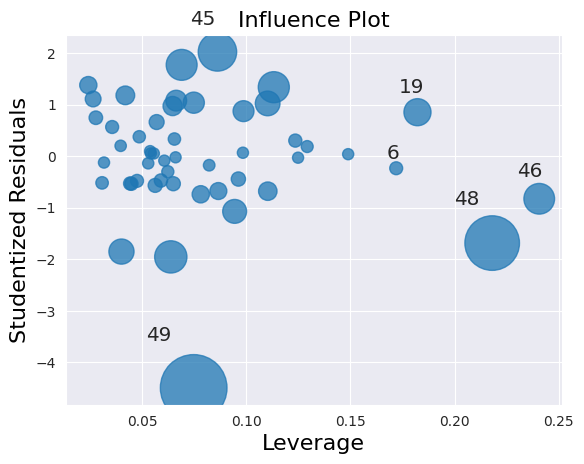

In [33]:
# Ploting influence plot
influence_plot(model)
plt.show()

# **From the above plot we can see that the datapoint 49 is the influencers**

In [34]:
## We will drop the row 49 to improve the model by removing the influencer for outlier
st1=st.drop(st.index[[49]],axis=0).reset_index(drop=True)

In [35]:
# Now we will build final model
if np.max(c)>0.5:
  model=smf.ols("profit~RnD+admin+MKT",data=st1).fit()
  (c,_)=model.get_influence().cooks_distance
  c
  np.max(c),np.argmax(c)
  st1=st1.drop(st1.index[[np.agrmax(c)]],axis=0).reset_index(drop=True)
  st1
else:
  final_model=smf.ols("profit~+RnD+admin+MKT",data=st1).fit()
  final_model.rsquared,final_model.aic
  print("Models accuracy is",final_model.rsquared)

Models accuracy is 0.9613162435129847


In [36]:
model.rsquared

0.9507459940683246

# **Hence we can see that the final_model= 0.96 accuracy has imporove than the previous model=0.95**

In [37]:
## Now will predict the final data.

In [38]:
Pred=final_model.predict(st1)
Pred

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [39]:
rs={"Total Models":["Model","Final Model"],"Rsquared":[model.rsquared,final_model.rsquared]}
rs1=pd.DataFrame(rs)
rs1

,Total Models,Rsquared
0,Model,0.950746
1,Final Model,0.961316


# **2nd- Toyota Corolla**

In [77]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
toyota=pd.read_csv("/content/ToyotaCorolla.csv",encoding="latin1") # As the data is text data we have used encoding=latin1 to extract the data.

In [42]:
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


**EDA**

In [43]:
toyo=toyota[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
toyo

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [44]:
## Renaming columns
toyo1=toyo.rename({"Age_08_04":"Age","Quarterly_Tax":"Tax"},axis=1)
toyo1

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [45]:
# checking the duplicatae values
toyo1[toyo1.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


We can see that there is duplicate value at 113 row, which we need to treat.

In [46]:
# Removing duplicate values.
toyota1=toyo1.drop_duplicates().reset_index(drop=True)
toyota1[toyota1.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight


We can see there are no duplicate values

In [47]:
toyota1.describe()

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [48]:
toyota1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1435 non-null   int64
 1   Age     1435 non-null   int64
 2   KM      1435 non-null   int64
 3   HP      1435 non-null   int64
 4   cc      1435 non-null   int64
 5   Doors   1435 non-null   int64
 6   Gears   1435 non-null   int64
 7   Tax     1435 non-null   int64
 8   Weight  1435 non-null   int64
dtypes: int64(9)
memory usage: 101.0 KB


In [49]:
toyota1.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


In [50]:
## Now Cheking Null values
toyota1.isnull().sum()

Price     0
Age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
Tax       0
Weight    0
dtype: int64

**There are no null values.**

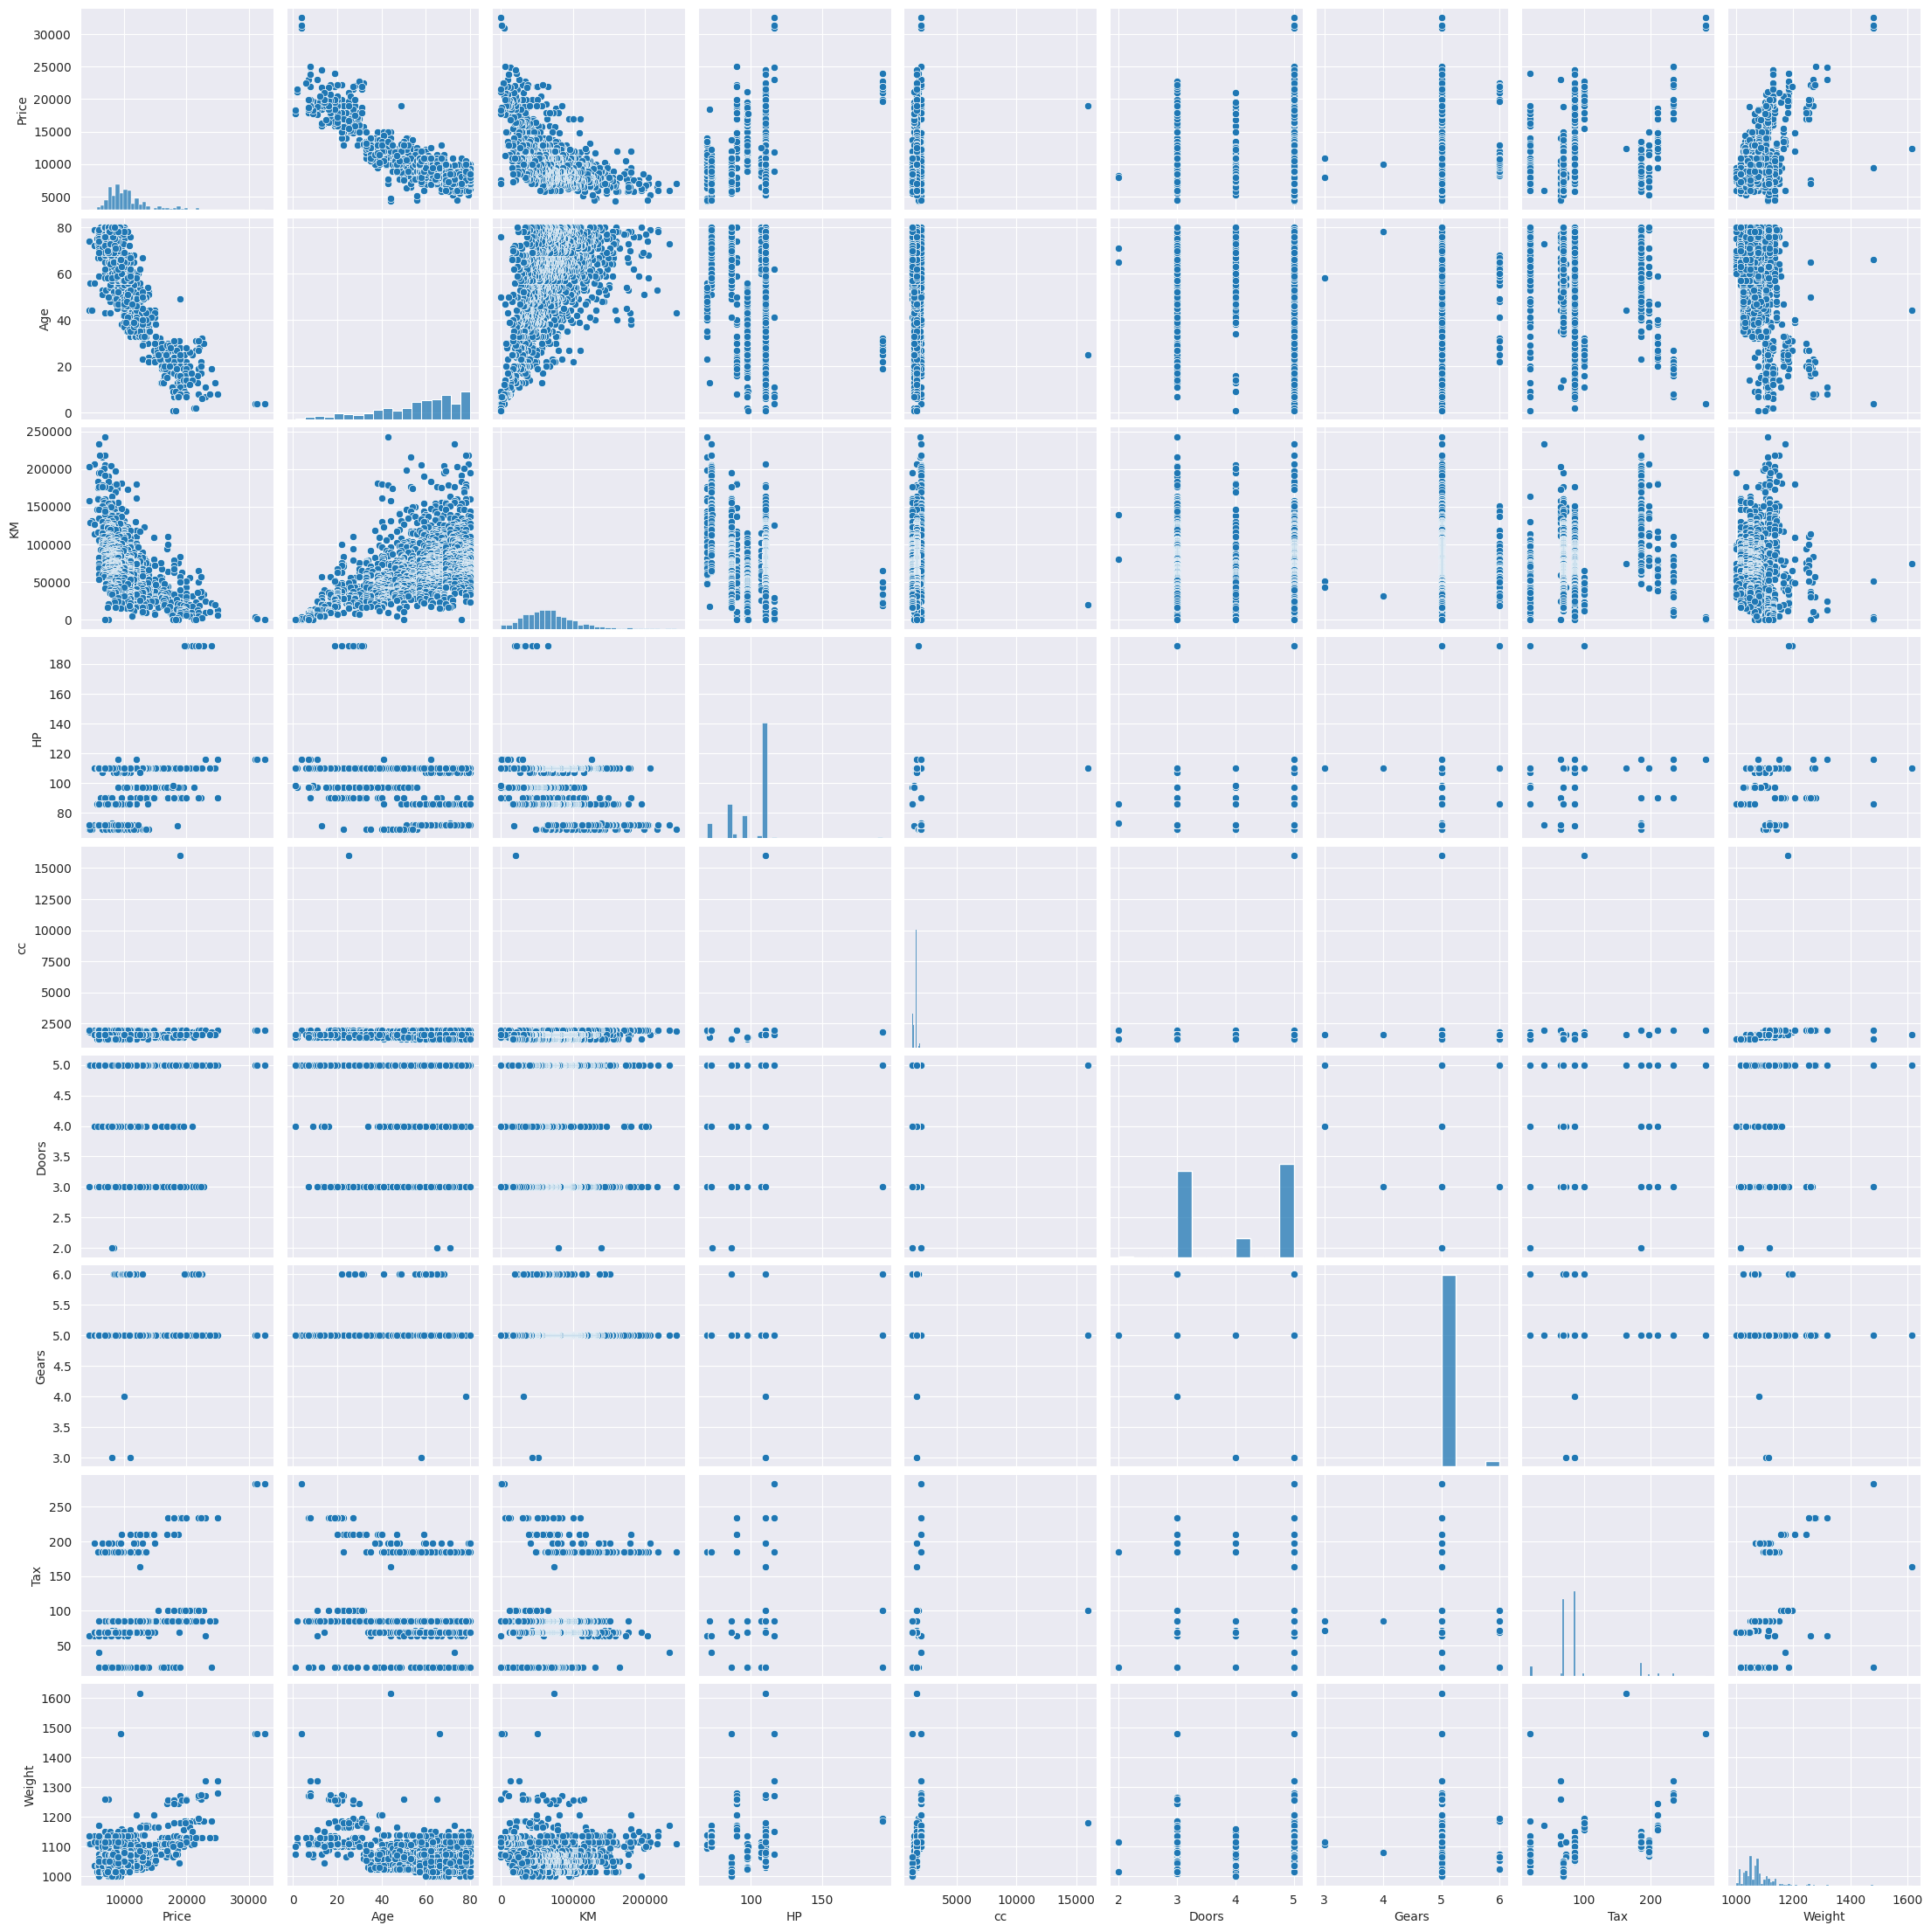

In [51]:
## Pairplot
sns.set_style(style="darkgrid")
sns.pairplot(toyota1)

# **Model Building**

In [52]:
#below Price is y variable (dependent), rest all are x variables(independent)
model=smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight",data=toyota1).fit()

In [53]:
print(model.tvalues,"\n",model.pvalues)

Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
cc           -1.316436
Doors        -0.023012
Gears         3.034563
Tax           2.944198
Weight       15.760663
dtype: float64 
 Intercept     1.113392e-04
Age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
cc            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
Tax           3.290363e-03
Weight        1.031118e-51
dtype: float64


# **Model valdation by Co-linearity check**

In [54]:
# We are calculating the VIF value of all independent variables, i.e(all x variables)
#VIF-variance inflation factor VIF = 1/(1-Rsquare)

rs_age=smf.ols("Age~+KM+HP+cc+Doors+Gears+Tax+Weight",data=toyota1).fit().rsquared
vif_age=1/(1-rs_age)


rs_km=smf.ols("KM~+HP+cc+Doors+Gears+Tax+Weight+Age",data=toyota1).fit().rsquared
vif_km=1/(1-rs_km)

rs_hp=smf.ols("HP~+KM+cc+Doors+Gears+Tax+Weight+Age",data=toyota1).fit().rsquared
vif_hp=1/(1-rs_hp)

rs_cc=smf.ols("cc~+HP+Doors+Gears+Tax+Weight+Age+KM",data=toyota1).fit().rsquared
vif_cc=1/(1-rs_cc)

rs_doors=smf.ols("Doors~+HP+cc+Gears+Tax+Weight+Age+KM",data=toyota1).fit().rsquared
vif_doors=1/(1-rs_doors)

rs_Gears=smf.ols("Gears~Doors+Tax+Weight+Age+KM+cc+HP",data=toyota1).fit().rsquared
vif_Gears=1/(1-rs_Gears)

rs_Tax=smf.ols("Tax~Gears+Gears+HP+Weight+Age+KM+cc",data=toyota1).fit().rsquared
vif_Tax=1/(1-rs_Tax)

rs_Weight=smf.ols("Weight~Tax+Gears+Gears+Tax+Age+KM+cc",data=toyota1).fit().rsquared
vif_Weight=1/(1-rs_Weight)


In [55]:
## Creating the dataframe of all VIF values

ty={"Variables":["Age","KM","HP","cc","Doors","Gears","Tax","Weight"],"VIF Values":[vif_age,vif_km,vif_km,vif_cc,vif_doors,vif_Gears,vif_Tax,vif_Weight]}

ty1=pd.DataFrame(ty)
ty1

,Variables,VIF Values
0,Age,1.876236
1,KM,1.757178
2,HP,1.757178
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Tax,2.282609
7,Weight,2.131704


In [56]:
# None variable has VIF>20, so there is No Collinearity issue, so consider all varaibles in Regression equation

# **Model validation by Residual Analysis**

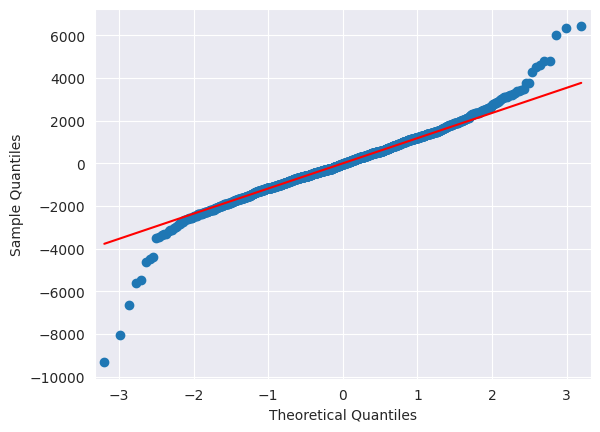

In [57]:
import statsmodels.api as sm
## Testing normality of residual by QQ plot
sm.qqplot(model.resid,line="q")
plt.show()

In [58]:
#List down the residual which are less than less than -6000 and greater than 6000.

list(np.where(model.resid<-6000))

[array([220, 600, 959])]

In [59]:
list(np.where(model.resid>6000))

[array([109, 146, 522])]

The above output show that the on lower end there is an outlier present at 220, 600, 959 and at top end the outlier is prsent at 109, 146, 522.

In [60]:
## Function defination for Z score, (Xi - mean)/std. dev.
def std(y):
  return (y-y.mean()/y.std())

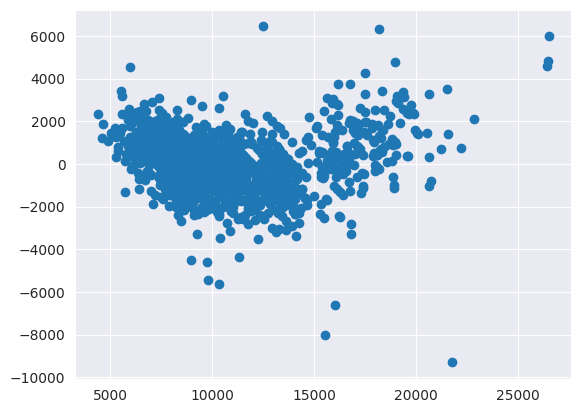

In [61]:
plt.scatter(std(model.fittedvalues),std(model.resid))
plt.show()

**Above we can see the outliers are majorly concentrated below -6000 and above 6000**

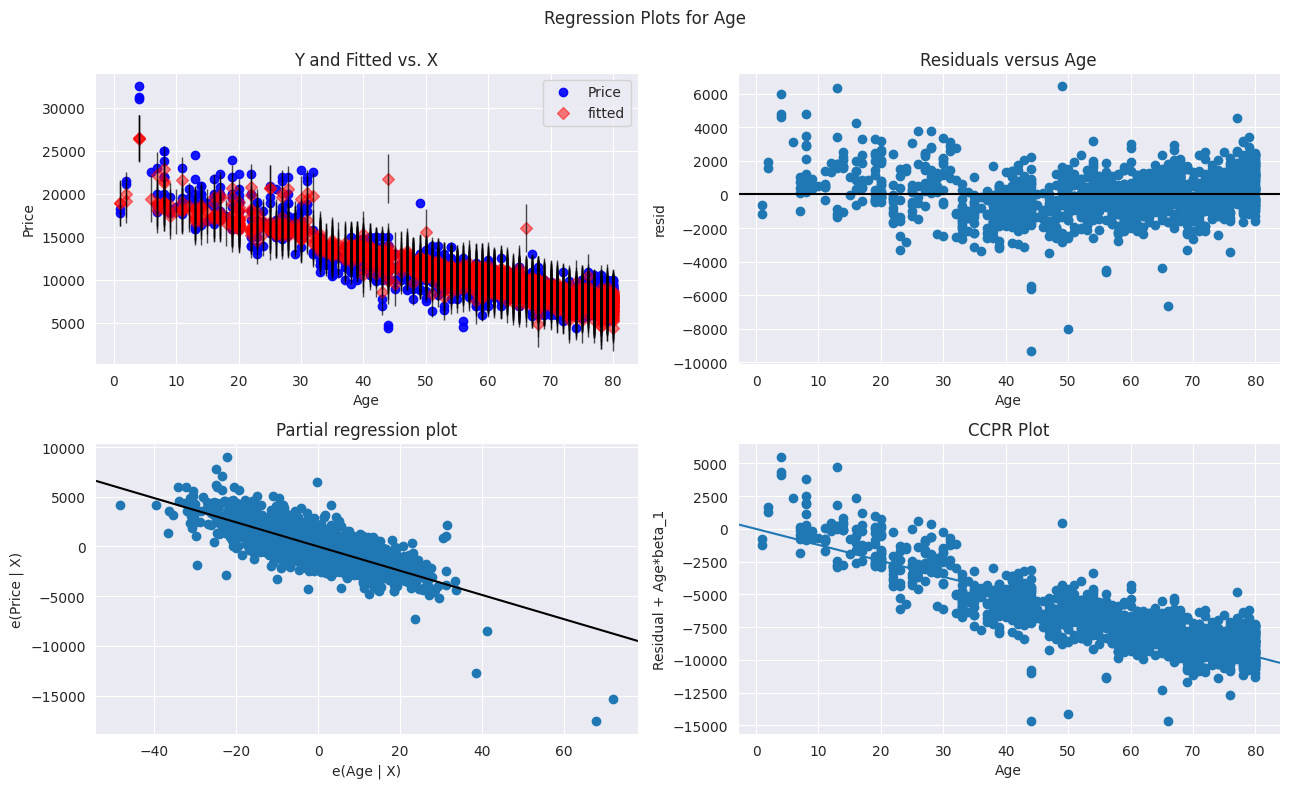

In [62]:
# Plotting residual Vs regressor plot to visualise the relation beween independent variable and dependent variables and erros
fig=plt.figure(figsize=(13,8))
sm.graphics.plot_regress_exog(model,"Age",fig=fig)
plt.show()

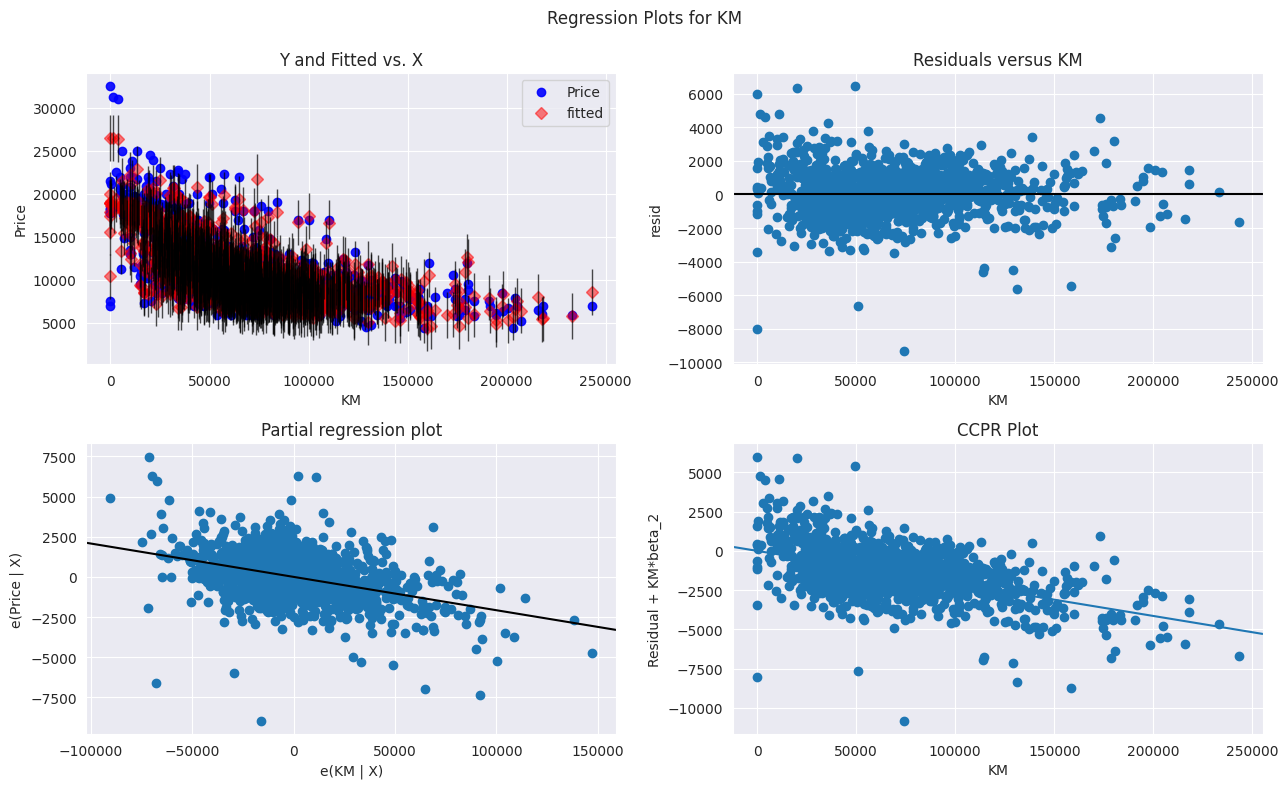

In [63]:
fig=plt.figure(figsize=(13,8))
sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()

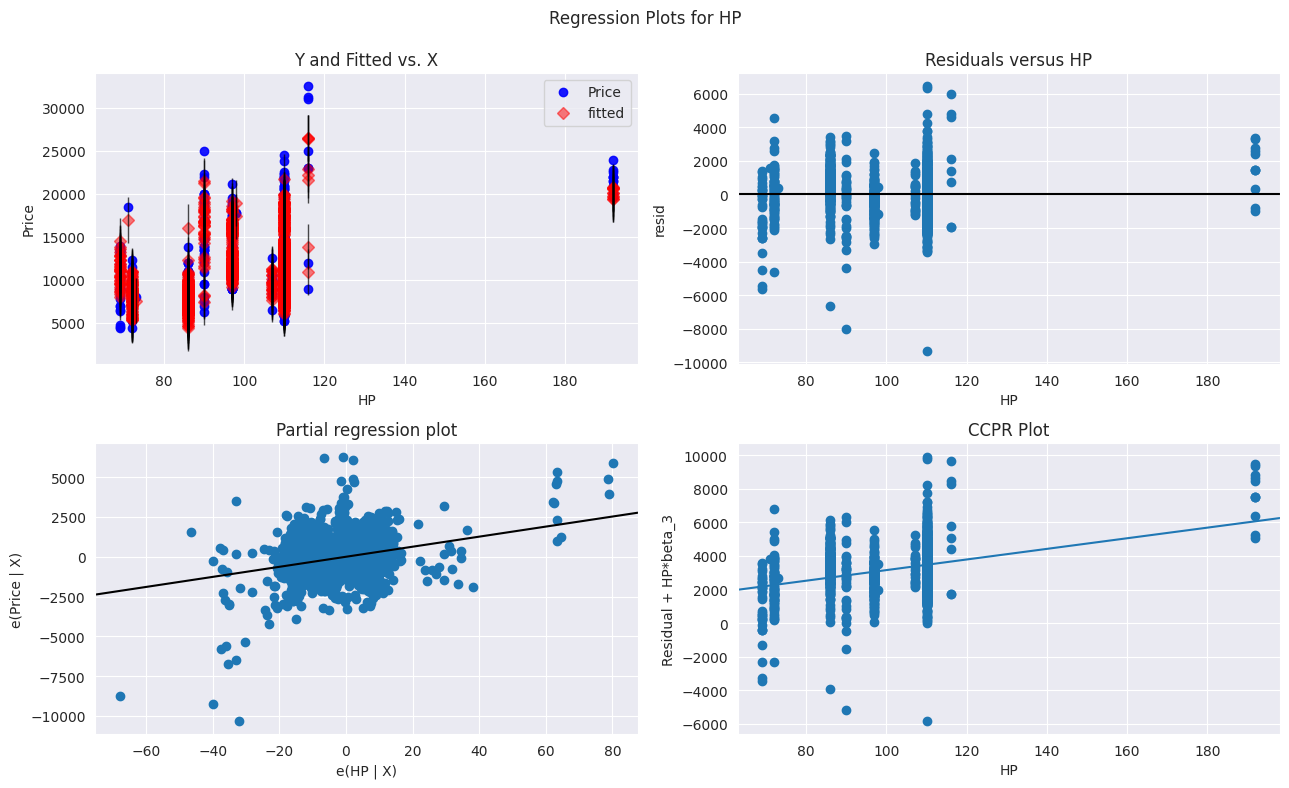

In [64]:
fig=plt.figure(figsize=(13,8))
sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

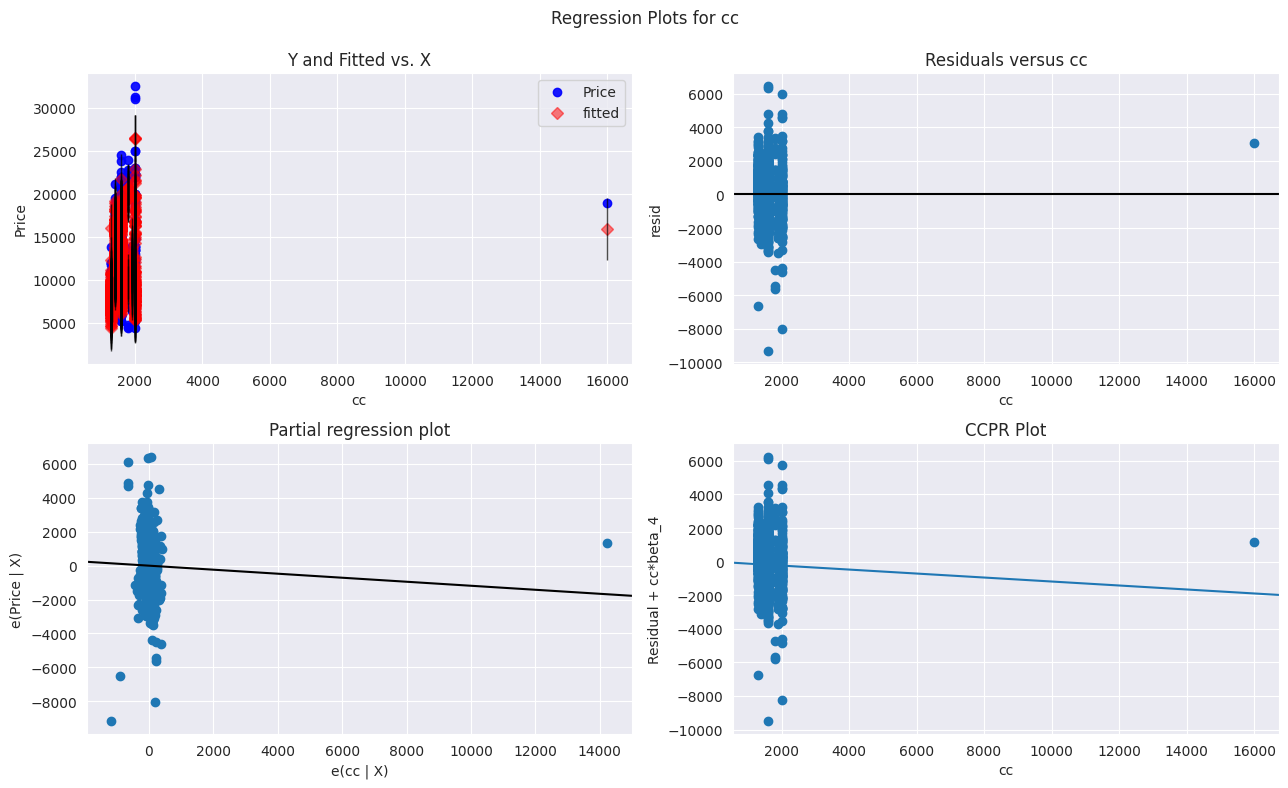

In [65]:
fig=plt.figure(figsize=(13,8))
sm.graphics.plot_regress_exog(model,"cc",fig=fig)
plt.show()

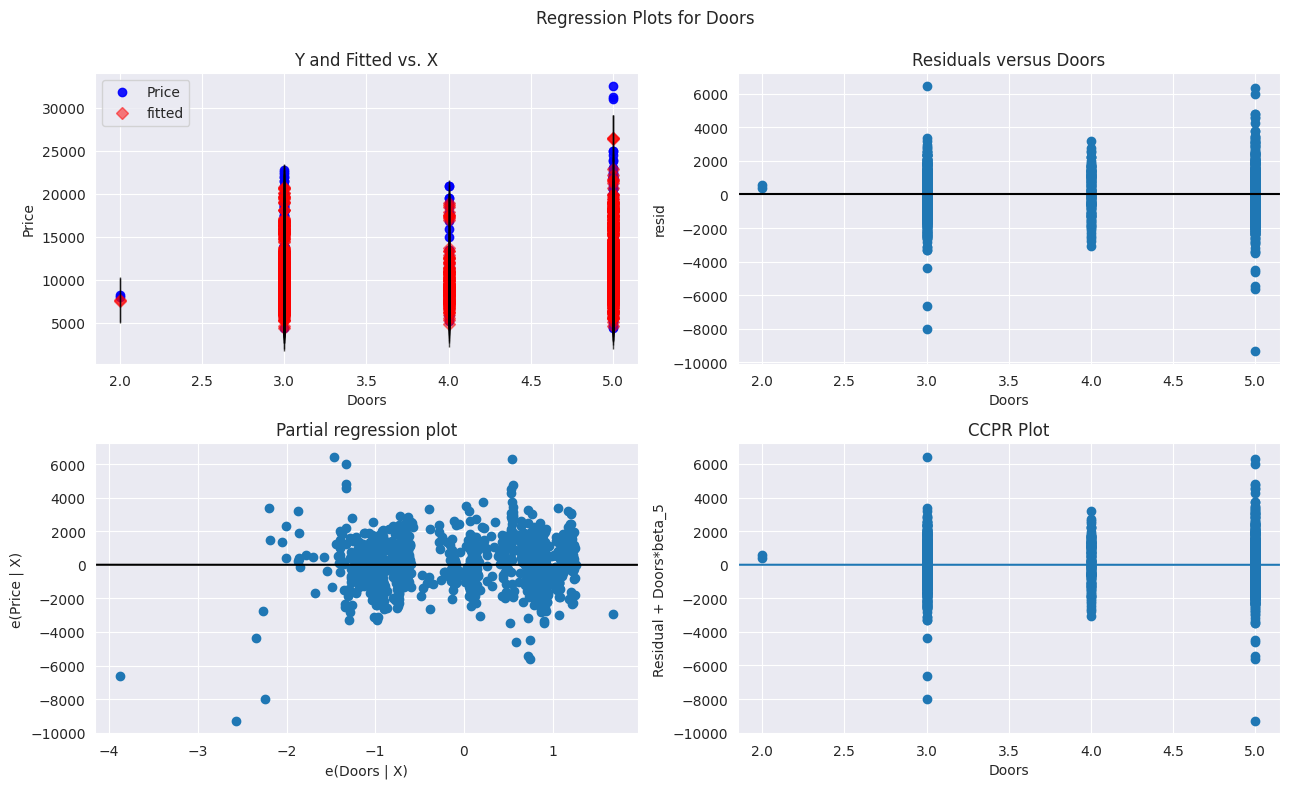

In [66]:
fig=plt.figure(figsize=(13,8))
sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()

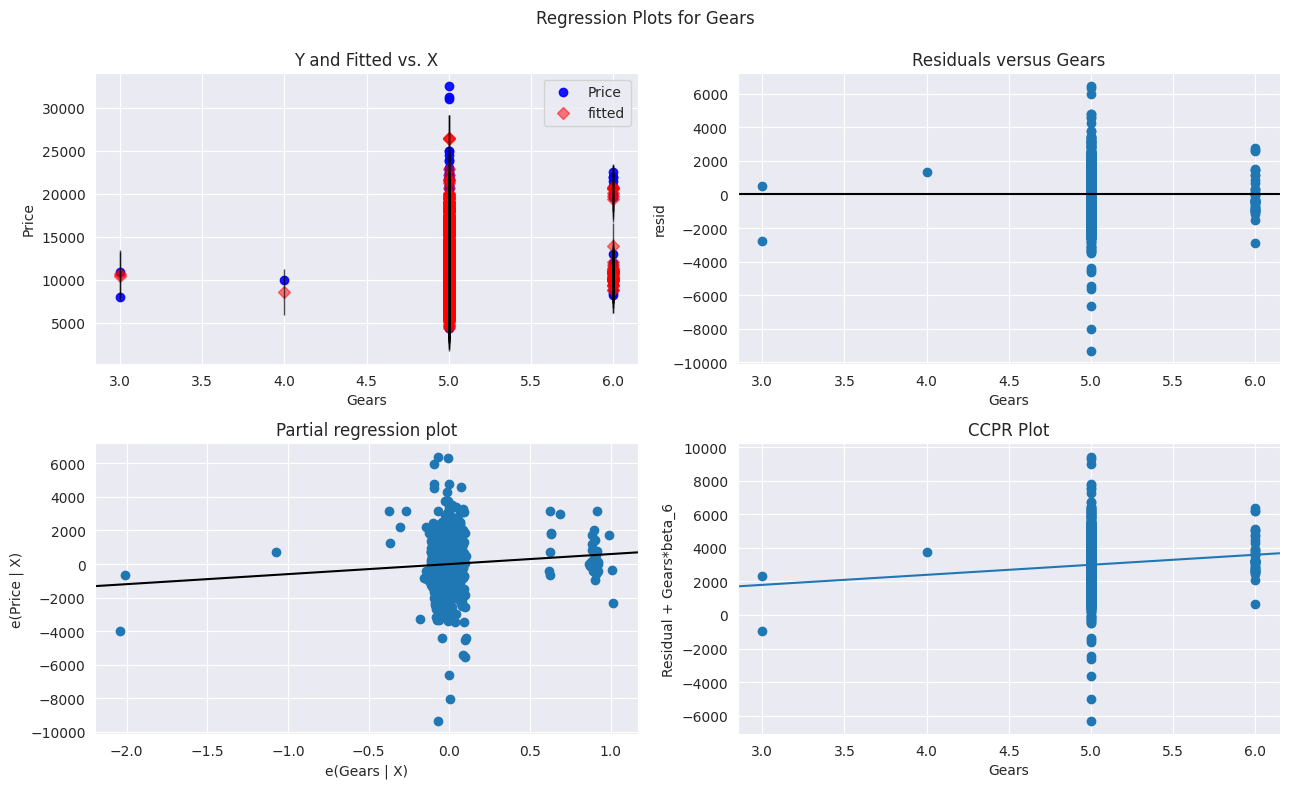

In [67]:
fig=plt.figure(figsize=(13,8))
sm.graphics.plot_regress_exog(model,"Gears",fig=fig)
plt.show()

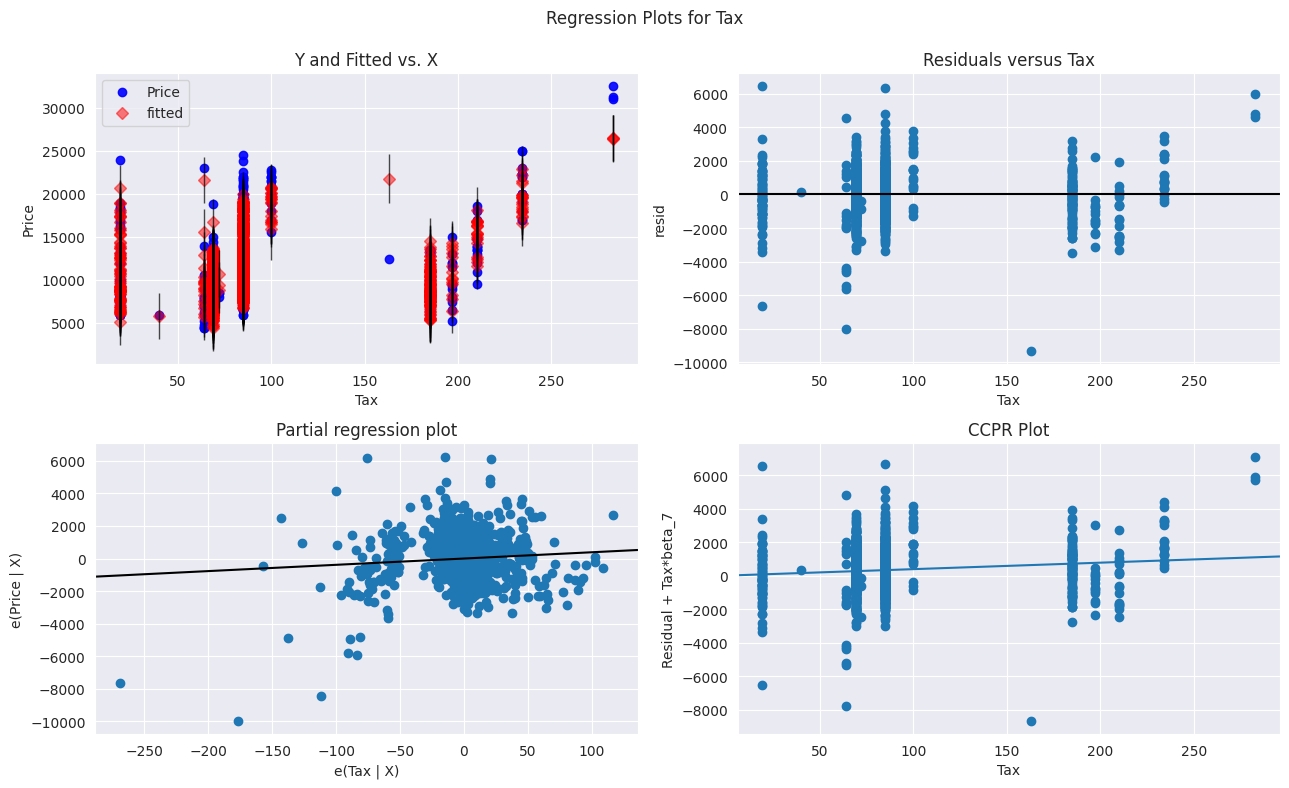

In [68]:
fig=plt.figure(figsize=(13,8))
sm.graphics.plot_regress_exog(model,"Tax",fig=fig)
plt.show()

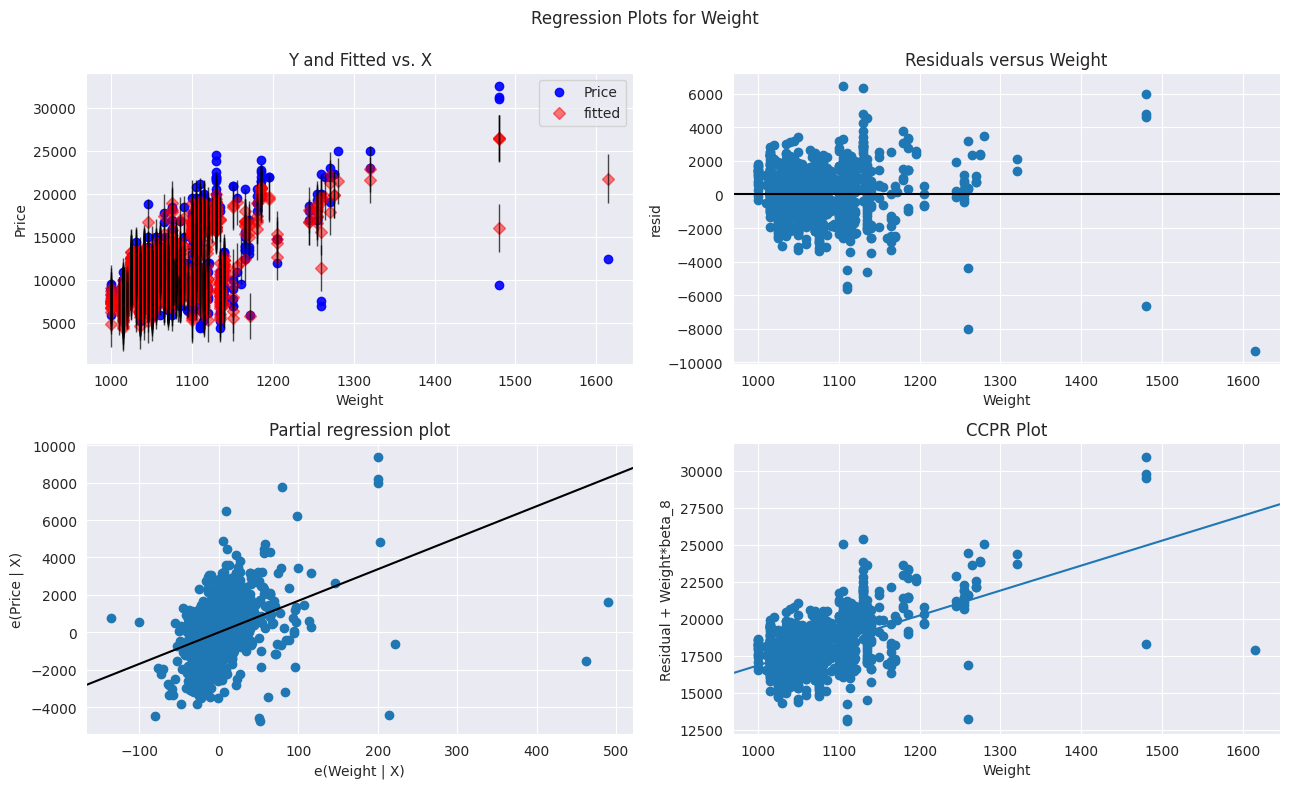

In [69]:
fig=plt.figure(figsize=(13,8))
sm.graphics.plot_regress_exog(model,"Weight",fig=fig)
plt.show()

# **Model Deletion Diagnostics for checking if there are any influencers or outlier by cooks distance**

In [70]:
from statsmodels.graphics.regressionplots import influence_plot
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

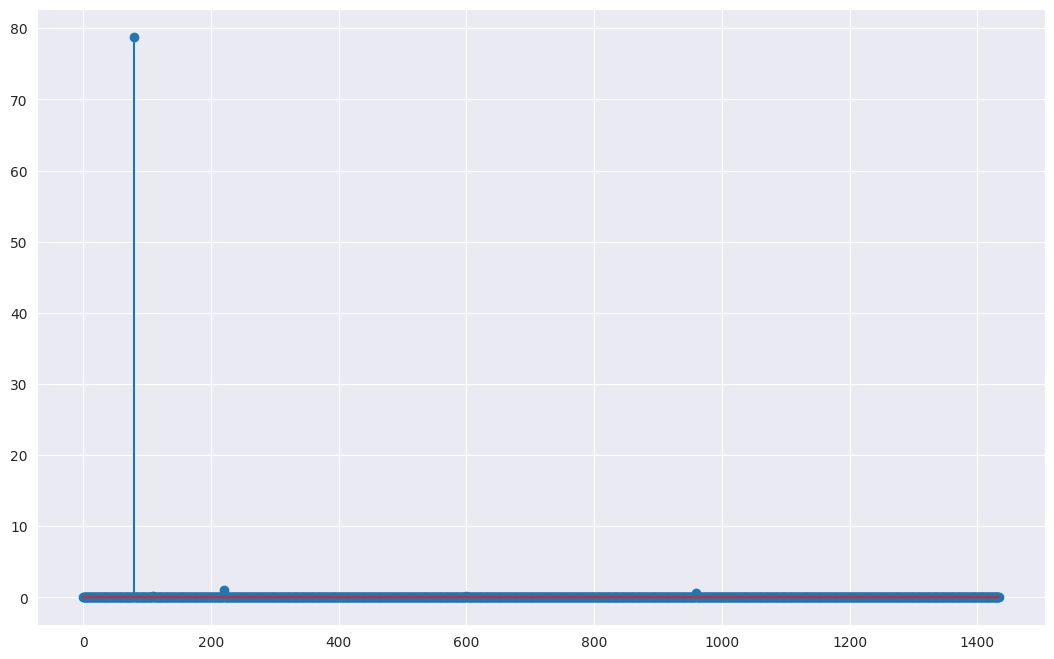

In [71]:
# Ploting stem plot to check the influencers
plt.figure(figsize=(13,8))
plt.stem(np.arange(len(toyota1)),np.round(c,5))
plt.show()

In [72]:
np.max(c),np.argmax(c)

(78.72950582258932, 80)

# **Model Deletion Diagnostics for checking if there are any influencers or outlier by leverage points**

In [73]:
# Leverage points, leverage cuttoff value= 3*(k+1)/n
# K= no of variables(columns), n= No of data points= (rows)
k=9
n=1435
cutoff=3*(k+1)/n
cutoff

0.020905923344947737

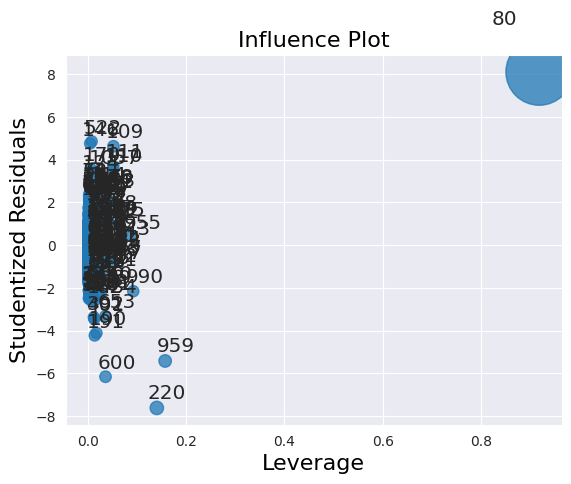

In [74]:
# Ploting influence plot
influence_plot(model)
plt.show()

In [75]:
#From the above plot we can see that the datapoint 49 is the influencers at index 80
## We will drop the row 49 to improve the model by removing the influencer for outlier
toy=toyota1.drop(toyota1.index[[80]],axis=0).reset_index(drop=True)
toy

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [85]:
# Now we will build final model

if np.max(c)>0.5:
  model=smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight",data=toy).fit()
  (c,_)=model.get_influence().cooks_distance
  c
  np.max(c),np.argmax(c)
  toy=toy.drop(toy.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
  toy
else:
  f_model=smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight",data=toy).fit()
  f_model.rsquared,f_model.aic
  print("Models accuracy is",f_model.rsquared)

Models accuracy is 0.8882395145171204


In [86]:
toy

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


# **Model Predictions**

In [87]:
f_model.predict(toy)

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64